# 主成分分析をwineデータセットに適用する

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
# データセットの読み込み
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(df_wine.head())

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

In [14]:
# データセットを訓練データとテストデータに分割する
x, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                     stratify=y, random_state=0)  
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)

x_train.shape =  (124, 13)
y_train.shape =  (124,)


### データを標準化する
$$
z_i=\frac{x_i-\mu}{\sigma}
$$
ここで$\mu$は平均、$\sigma$は分散を表す

In [39]:
import math
# データを標準化する関数
def standardize(x):
    return (x-x.mean()) / x.std()

In [40]:
# xデータの標準化
#x_train_std = standardize(x_train)
#x_test_std = standardize(x_test)

#ライブラリを用いた場合
sc = StandardScaler()
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.transform(x_test)

In [41]:
# 固有値と固有ベクトルの計算
covar_mat = np.cov(x_train_std.T)  # 共分散行列を計算
eigen_vals, eigen_vecs = np.linalg.eig(covar_mat)  # 共分散行列から固有値と固有ベクトルを計算
print('\nEigenvalues \n%s' % eigen_vals)  # 固有値の表示
print('\nEigenvectors \n%s' % eigen_vecs)  # 固有ベクトルの表示


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

Eigenvectors 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
  -2.90625226e-01  2.99096847e-01  7.90529293e-02 -3.68176414e-01
  -3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
   8.95378697e-02  6.27036396e-01 -2.74002014e-01 -1.25775752e-02
   1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
  -1.60834991e-01  3.89128239e-04  1.32328045e-01  1.77578177e-01
   3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
   5.15873402e-02 -4.05836452e-02  2.23999097e-01 -4.40592110e-01
  -2.43373853e-01 -1.30485780e-01 -4.18953

contribution rate:
 [0.36951468599607645, 0.18434927059884165, 0.11815159094596986, 0.07334251763785471, 0.06422107821731672, 0.05051724484907654, 0.03954653891241449, 0.026439183169220035, 0.02389319259185293, 0.016296137737251016, 0.013800211221948418, 0.01172226244308596, 0.008206085679091375]
cumulative contribution rate:
 [0.36951469 0.55386396 0.67201555 0.74535807 0.80957914 0.86009639
 0.89964293 0.92608211 0.9499753  0.96627144 0.98007165 0.99179391
 1.        ]


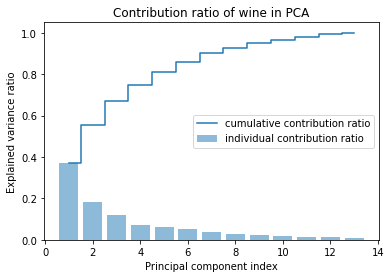

In [50]:
# 寄与率と累積寄与率
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('contribution rate:\n', var_exp)
print('cumulative contribution rate:\n', cum_var_exp)
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual contribution ratio')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative contribution ratio')
plt.title('Contribution ratio of wine in PCA')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.savefig('wine_PCA_explained_variance.png')
plt.show()

In [43]:
# 射影行列を作成
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])  # 固有値と固有ベクトルをセットにしたものを作成
               for i in range(len(eigen_vals))]  
eigen_pairs.sort(key=lambda k: k[0], reverse=True)  # 固有対のソート
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))  # 上位2つのベクトルを取得
print(w)  # 射影行列w(13×2)を表示

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


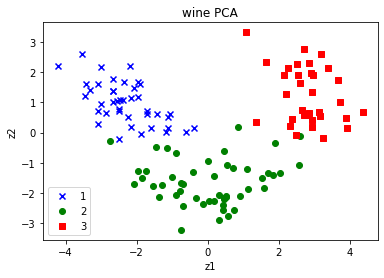

In [52]:
# データセットを射影行列で変換
x_train_pca = x_train_std.dot(w)

# 変換したデータをプロットする
colors = ['b', 'g', 'r']
markers = ['x', 'o', 's']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train == l, 0], 
                x_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
plt.title('wine PCA')
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend(loc='lower left')
plt.savefig('wine_PCA.png')
plt.show()

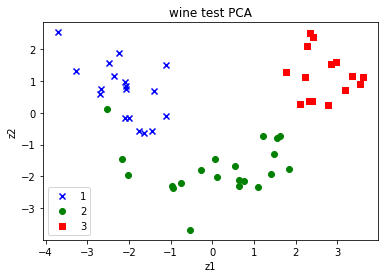

In [53]:
# データセットを射影行列で変換
x_test_pca = x_test_std.dot(w)

# 変換したデータをプロットする
colors = ['b', 'g', 'r']
markers = ['x', 'o', 's']

for l, c, m in zip(np.unique(y_test), colors, markers):
    plt.scatter(x_test_pca[y_test == l, 0], 
                x_test_pca[y_test == l, 1], 
                c=c, label=l, marker=m)
plt.title('wine test PCA')
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend(loc='lower left')
plt.savefig('wine_PCA_test.png')
plt.show()